# **Aprendendo sobre clusters com Alura**
<center>
<img src="../img/andreson.png" />
</center>

**Autor:** Andreson Almeida Azevedo

Este notebook esta sendo construindo, utilizando os conhecimento iniciais sobre análise de cluster em python, utilizando como referências o curso [Alura](https://cursos.alura.com.br/course/cluster-analysis). Irei utilizar inicialmente a seguinte [Base de dados](https://www.kaggle.com/datasets/mehmetisik/livecsv) que esta disponível no Kaggle.

[Link Original](https://archive.ics.uci.edu/dataset/488/facebook+live+sellers+in+thailand)

[Paper sobre dataset](https://sci-hub.ru/10.1016/j.dib.2020.105661)

# Carregado bibliotecas

In [107]:
!pip install scikit-learn-extra

  Using cached scikit_learn_extra-0.3.0-cp39-cp39-win_amd64.whl (346 kB)


In [108]:
# dados
import pandas as pd
import numpy as np

# pre-processamento
from sklearn.preprocessing import Normalizer

# algoritmos cluster
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
# k-vizinhos mais próximos
from sklearn.neighbors import NearestNeighbors

# métricas de validação
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Visualizações
import matplotlib.pyplot as plt
import seaborn as sns

# salvar e carregar modelo

import pickle

In [8]:
df = pd.read_csv('../data/Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
# dimensão da base?
df.shape

(7050, 16)

In [3]:
# Verificando dados faltantes

df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [9]:
# removendo colunas sem informação

df.drop(columns=['status_id','status_type','status_published','Column1','Column2','Column3', 'Column4'], inplace=True)

df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


In [10]:
# normalizando os dados
df_normalize = Normalizer().fit_transform(df.values)
print(df_normalize)

[[0.58933393 0.57039503 0.29188183 ... 0.00111405 0.00111405 0.        ]
 [0.70710678 0.         0.         ... 0.         0.         0.        ]
 [0.58122455 0.6042687  0.14594625 ... 0.00256046 0.         0.        ]
 ...
 [0.81649658 0.         0.         ... 0.         0.         0.        ]
 [0.70821134 0.02421235 0.04438931 ... 0.         0.         0.        ]
 [0.70710678 0.         0.         ... 0.         0.         0.        ]]


In [62]:
def clustering_algorithm(n_clusters, df_ref, n_init = 10, max_iter = 300, random_state = 101):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, random_state=random_state)
    labels = kmeans.fit_predict(df_ref)
    s = silhouette_score(df_ref, labels, metric="euclidean")
    dbs = davies_bouldin_score(df_ref, labels)
    calinsky = calinski_harabasz_score(df_ref, labels)
    return [n_clusters, s, dbs, calinsky]

In [67]:
def Validar_cluster(n_groups, df, n_init=10,
    max_iter=300,
    random_state=101):
    df_metricas = pd.DataFrame(columns=['k','silhoutte', 'davies_bouldin', 'calinski_harabaz'])
    i = 0
    for k in n_groups:
        print(i)
        df_metricas.loc[i] = clustering_algorithm(k, df, n_init=n_init,
    max_iter=max_iter,
    random_state=random_state)
        i = i+1  
    return df_metricas

In [64]:
? clustering_algorithm

Signature:
 clustering_algorithm(
    n_clusters,
    df_ref,
    n_init=10,
    max_iter=300,
    random_state=101,
)
Docstring: <no docstring>
File:      c:\users\andre\appdata\local\temp\ipykernel_21004\3029244531.py
Type:      function

In [63]:
? Validar_cluster

Signature:  Validar_cluster(n_groups, df)
Docstring: <no docstring>
File:      c:\users\andre\appdata\local\temp\ipykernel_21004\963260957.py
Type:      function

In [68]:
df_a = Validar_cluster([3,4,5,6,7,8,9,10,20,30,40,50], df_normalize, n_init=100,
    max_iter=3000,
    random_state=101)

0
1
2
3
4
5
6
7
8
9
10
11


In [69]:
df_a

,k,silhoutte,davies_bouldin,calinski_harabaz
0,3.0,0.815647,0.510467,16902.991770
1,4.0,0.747904,0.563464,18885.731066
2,5.0,0.709582,0.699243,18355.148326
3,6.0,0.621959,0.684290,18163.091531
4,7.0,0.629419,0.682977,18688.340222
5,8.0,0.553850,0.723079,18434.021933
6,9.0,0.570191,0.657142,18851.216644
7,10.0,0.549060,0.717407,19089.064771
8,20.0,0.473674,0.802497,18953.811231
9,30.0,0.470813,0.849208,17875.085687


In [71]:
df_a.min()
#silhoutte               0.815647 (max)
#davies_bouldin          0.510467  (min)
#calinski_harabaz    19089.064771 (max)

k                       3.000000
silhoutte               0.422134
davies_bouldin          0.510467
calinski_harabaz    16902.991770
dtype: float64

[Métricas Silhouette e Davies Bouldin](https://www.dca.fee.unicamp.br/~lboccato/topico_8_clusterizacao.pdf)

In [52]:
# interpretação: silhouette, quanto maior melhor
#                Davies bouldin, quanto menor melhor
#                Calinsky harabaz, quanto maior melhor


df_a

,k,silhoutte,davies_bouldin,calinski_harabaz
0,3.0,0.815647,0.510467,16902.991770
1,4.0,0.747904,0.563464,18885.731066
2,5.0,0.709520,0.698777,18354.989664
3,6.0,0.616452,0.689106,18163.113505
4,7.0,0.629419,0.682977,18688.340222
5,8.0,0.553465,0.724094,18431.542337
6,9.0,0.565991,0.654901,18812.538672
7,10.0,0.550898,0.719537,19081.721969
8,20.0,0.475898,0.781564,18778.825358
9,30.0,0.468889,0.854688,17650.657165


In [ ]:
# pelas métricas silhoutte e davie boudin, o melhor tamanho de clusters é 3

In [72]:
# setando o modelo
model = KMeans(n_clusters = 3, n_init=100,
    max_iter=3000,
    random_state=101)

In [73]:
# aplicando o predict

y_pred = model.fit_predict(df_normalize)

## Validar a estabilidade dos clusters

Separamos a base em parte diferente, para avaliar se as métricas irão ter mudanças
se as metricas não tiverem grandes mudanças temos evidências que os cluster estão estáveis

In [74]:
set1, set2, set3 = np.array_split(df_normalize, 3)
print(clustering_algorithm(3, set1,n_init=100,
    max_iter=3000,
    random_state=101))
print(clustering_algorithm(3, set2,n_init=100,
    max_iter=3000,
    random_state=101))
print(clustering_algorithm(3, set3,n_init=100,
    max_iter=3000,
    random_state=101))

[3, 0.7180952484647748, 0.775718236908741, 2664.9430178825028]
[3, 0.7897461541106873, 0.46312336037769364, 4936.685342024458]
[3, 0.7478681560186098, 0.68800662206778, 13132.810593409498]


Os dados não tem uma grande estabilidade das métricas, é um indicio, que os clusters
não estão bem definidos

In [77]:
df_normalize.shape

(7050, 9)

## Interpretar os resultados do cluster

In [110]:
# colentado os centroides
print(model.cluster_centers_)

[[ 7.05306611e-01  6.73705312e-02  1.72726608e-02  6.92940960e-01
   7.85753620e-03  2.39388006e-03  8.98319923e-04  9.55109578e-04
   2.53815272e-04]
 [ 3.06462758e-01  8.46636087e-01  2.02662327e-01  2.35960818e-01
   6.38927361e-02  3.14684914e-03  2.49988975e-03  5.57326563e-04
   4.05138379e-04]
 [ 3.73162259e-02  1.43085931e-02  1.29927113e-01  2.04170811e-02
   1.67049754e-02  1.05715333e-04  6.02058592e-05 -7.58941521e-19
   2.82482447e-05]]


In [120]:
df_centroids = pd.DataFrame(columns=['VARIAVEL', 'VARIANCIA'])
max = len(model.cluster_centers_[0])
for i in range(max):
    df_centroids.loc[i] = [df.columns.values[i], "{:4f}".format(model.cluster_centers_[:, i].var())]
    #print(df.columns.values[i], "\n{:4f}".format(kmeans.cluster_centers_[:, i].var()))

In [131]:
df['cluster'] = model.labels_
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,529,512,262,432,92,3,1,1,0,1
1,150,0,0,150,0,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0,1
3,111,0,0,111,0,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0,0


In [123]:
df_centroids.sort_values('VARIANCIA', ascending=False)

,VARIAVEL,VARIANCIA
1,num_comments,0.144760
3,num_likes,0.078620
0,num_reactions,0.075303
2,num_shares,0.005817
4,num_loves,0.000605
5,num_wows,0.000002
6,num_hahas,0.000001
7,num_sads,0.000000
8,num_angrys,0.000000


In [136]:
description = df[['num_comments','num_likes','num_reactions','num_shares','cluster']].groupby('cluster')
n_clientes = description.size()
description = description.mean()
description['n_cliente'] = n_clientes
print(description.reset_index())

   cluster  num_comments   num_likes  num_reactions  num_shares  n_cliente
0        0     16.450967  215.672652     219.224965    4.199586       5792
1        1   1326.589286  237.902679     314.352679  228.172321       1120
2        2      4.681159    3.094203       3.623188   16.536232        138


CLUSTER 0: MAIOR QUANTIDADE DE POSTAGENS, MENOR NÚMERO DE COMPARTILHAMENTOS
    
CLUSTER 1: MAIOR NÚMERO DE COMENTÁRIOS

CLUSTER 2: MENOR NÚMERO DE LIKES E REAÇÕES, MENOR NÚMERO DE PESSOAS

CLUSTER 0: É O GRUPO COM A MAIOR QUANTIDADE DE POSTAGENS, SÃO POSTAGENS POUCO COMENTADAS E COMPARTILHADAS,
MAS COM UM BOM NÚMERO DE REAÇÕES E LIKES.

CLUSTER 1: É O GRUPO DE POSTAGENS, QUE GERARAM MUITO ENGAJAMENTO A NÍVEL DE COMENTÁRIOS, LIKES, REAÇÕES E COMPARTILHAMENTOS.

CLUSTER 2: É O MENOR GRUPO DE POSTAGENS, QUE TEM POUCO ENGAJAMENTO

CLUSTER 0: Postagens com engajamento de like e reações, maior grupo.

CLUSTER 1: Postagens com muito engajamento.

CLUSTER 0: Postagens com pouco engajamento, menor grupo.

# Testando DBscan

## Calcular o epsilon  

para isto iremos utilizar  média via k pontos do knn, a definição é feita considerando
    colunas + 1, considerar o k igual ou maio ao resultado, k-medias = k-1
,

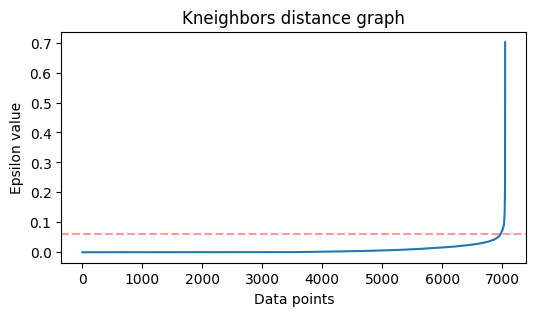

In [90]:
nn = NearestNeighbors(n_neighbors=4) # minimum points -1
nbrs = nn.fit(df_normalize)
distances, indices = nbrs.kneighbors(df_normalize)

distances = np.sort(distances, axis=0)
distances = distances[:,1] # Choosing only the smallest distances

import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.plot(distances)
plt.axhline(y=0.06, color='r', linestyle='--', alpha=0.4) # elbow line
plt.title('Kneighbors distance graph')
plt.xlabel('Data points')
plt.ylabel('Epsilon value')
plt.show();

Valor do epsilon é 0,06

In [99]:
def clustering_algorithm(df_ref, eps = 0.06, min_samples = 11):
    dbs = DBSCAN(eps=eps, min_samples=min_samples)
    dbs.fit(df_ref)
    labels = dbs.labels_
    s = silhouette_score(df_ref, labels, metric="euclidean")
    dbs = davies_bouldin_score(df_ref, labels)
    calinsky = calinski_harabasz_score(df_ref, labels)
    return [s, dbs, calinsky]

In [100]:
clustering_algorithm(df_ref=df_normalize, eps=0.06, min_samples=10)

[0.2885929109749816, 1.2883082939864294, 181.0443439884671]

In [ ]:
kmedoids = KMedoids(n_clusters=3).fit(Clus_dataSet)